# Morizono-Lidz Cellular Automata Simulator

This project was inspired by Wolfram's Elementary Cellular Automata. These are 1D cellular atomata, meaning each generation is just an array. The arrays contain single bits, which transform over subsequent generations. They transform based on a given ruleset, which can be encoded as a binary octet.

In this project, we will atempt a more complex simulation which can handle a 1D array of rgb triplets (either an array of rgb values or a hexit sextet. There are clearly many more possible rules ( 2^72 possible neighborhoods that need to be encoded to 2^24 states). 

We will start with a smaller color set as proof of concept, and will try to extend to a larger variety of colors.

## Hopes:
- completely chaotic colors
- cool randomness that can be explored

## Concerns:
- way to many rules to implement
- efficiency?

## Plans:
- randomize rules initially, then save them to afterwards
- use dictionaries to quickly traverse states (may be too big)
- create a function that calcultes new color instead of searching for a given triple


In [60]:
import numpy as np
from matplotlib import pyplot as plt
import random

## Testing Array to Image conversion

Proof that we can convert between a numpy array and a visual image

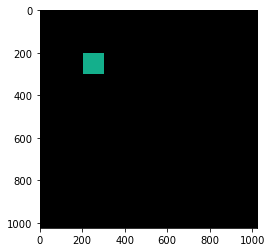

In [41]:
data = np.zeros( (1024,1024,3), dtype=np.uint8)
for x in range(len(data)):
    for y in range(len(data[x])):
        if (x>200 and x<300) and (y>200 and y<300):
            data[x,y] = [20,175,140]
plt.imshow(data, interpolation='nearest')
plt.show()

## Testing Binary Triplet Colors

Testing color encoding with a rule triplet. Colors channels will be transformed individually and then recombined for the final image

We currently have 8 possible colors: 000, 001, 010, 011, 100, 101, 110, 111
If we split this into 3 color channels, we can just create 3 elementary cellular automata. 

This is effectively a very low threshold simulator

### Defining Rules

In [42]:

def decimalToBinary(n): 
    return format(int(n),'#010b')

def rule(a, b , c, Rule):
    triple = str(a)+str(b)+str(c)
    rules = {"000": decimalToBinary(Rule)[2],"001": decimalToBinary(Rule)[3],
            "010": decimalToBinary(Rule)[4],"011": decimalToBinary(Rule)[5],
            "100": decimalToBinary(Rule)[6],"101": decimalToBinary(Rule)[7],
            "110": decimalToBinary(Rule)[8],"111": decimalToBinary(Rule)[9]}
    return rules[triple]

### Wolfram's Elementary Cellular Automata (thrice)

In [53]:
def splitChannels(state):
    return state[:,0], state[:,1],state[:,2]
                               
def Wolfram(state, Rule):
    next_state = []
    for i in range(len(state)):
        if i == 0:
            next_state.append(rule(0,state[i],state[i+1], Rule))
        elif i == len(state)-1:
            next_state.append(rule(state[i-1],state[i],0, Rule))
        else:
            next_state.append(rule(state[i-1],state[i],state[i+1], Rule))
                
    return next_state

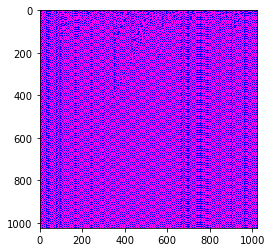

In [94]:
generations = 1024
RedRule = 110
GreenRule = 0
BlueRule = 255
image = np.random.randint(2, size =(generations, 1024, 3))
start_state = np.random.randint(2, size = (1,1024,3))
#start_state = np.zeros((1,1024,3), dtype=np.uint8)
#start_state[0][random.randint(1,1024)] = np.array([1,0,0])



image[0] = start_state[0]
for n in range(1,generations):
    next_state = []
    red,green,blue = splitChannels(image[n-1])
    red_state = Wolfram(red,RedRule)
    green_state = Wolfram(green,GreenRule)
    blue_state = Wolfram(blue,BlueRule)
    for i in range(1024):
        next_state.append([red_state[i],green_state[i],blue_state[i]])
    image[n] = np.array(next_state)
data = image*255
plt.imshow(data, interpolation='nearest')
plt.show()
